In [22]:
!pip install -q --upgrade langchain langchain_core langchain_community

In [23]:
import os

import json 
with open('/Users/kaustuv/Desktop/AI_projects/config.json') as f:
    config = json.load(f) 
    os.environ['LANGCHAIN_API_KEY'] = config['LANGCHAIN_API_KEY']
    os.environ["TAVILY_API_KEY"] = config['TAVILY_API_KEY']

os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_ENDPOINT'] = 'https://api.smith.langchain.com'


In [24]:
from typing import Annotated, Literal, TypedDict

from langchain_core.messages import HumanMessage
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import END, StateGraph, MessagesState
from langgraph.prebuilt import ToolNode
from langchain_community.chat_models import ChatOllama



# # Define the tools for the agent to use
# @tool
# def search(query: str):
#     """Call to surf the web."""
#     # This is a placeholder, but don't tell the LLM that...
#     if "sf" in query.lower() or "san francisco" in query.lower():
#         return "It's 60 degrees and foggy."
#     return "It's 90 degrees and sunny."


# tools = [search]

# tool_node = ToolNode(tools)

local_llm = "llama3.1"
llm = ChatOllama(model=local_llm, 
                 temperature=0)


# # Define the function that determines whether to continue or not
# def should_continue(state: MessagesState) -> Literal["tools", END]:
#     messages = state['messages']
#     last_message = messages[-1]
#     # If the LLM makes a tool call, then we route to the "tools" node
#     if last_message.tool_calls:
#         return "tools"
#     # Otherwise, we stop (reply to the user)
#     return END


# Define the function that calls the model
def call_model(state: MessagesState):
    messages = state['messages']
    response = llm.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}


# Define a new graph
workflow = StateGraph(MessagesState)

# Define the two nodes we will cycle between
workflow.add_node("agent", call_model)
# workflow.add_node("tools", tool_node)

# Set the entrypoint as `agent`
# This means that this node is the first one called
workflow.set_entry_point("agent")

# # We now add a conditional edge
# workflow.add_conditional_edges(
#     # First, we define the start node. We use `agent`.
#     # This means these are the edges taken after the `agent` node is called.
#     "agent",
#     # Next, we pass in the function that will determine which node is called next.
#     should_continue,
# )

# We now add a normal edge from `tools` to `agent`.
# This means that after `tools` is called, `agent` node is called next.
# workflow.add_edge("tools", 'agent')

# Initialize memory to persist state between graph runs
checkpointer = MemorySaver()

# Finally, we compile it!
# This compiles it into a LangChain Runnable,
# meaning you can use it as you would any other runnable.
# Note that we're (optionally) passing the memory when compiling the graph
app = workflow.compile(checkpointer=checkpointer)



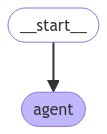

In [25]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [26]:
# Use the Runnable
final_state = app.invoke(
    {"messages": [HumanMessage(content="largest planet in solar system")]},
    config={"configurable": {"thread_id": 42}}
)
final_state["messages"][-1].content

"The largest planet in our solar system is **Jupiter**.\n\nHere are some fascinating facts about Jupiter:\n\n1. **Size**: Jupiter is the largest of all the planets, with a diameter of approximately 142,984 kilometers (88,846 miles). This is more than 11 times the diameter of the Earth!\n2. **Mass**: Jupiter is so massive that it makes up about 2.5 times the mass of all the other planets in our solar system combined.\n3. **Composition**: Jupiter is a gas giant, meaning it's primarily composed of hydrogen and helium gases.\n4. **Moons**: Jupiter has a whopping 79 known moons, with four large ones: Io, Europa, Ganymede, and Callisto.\n5. **Atmosphere**: Jupiter's atmosphere is known for its vibrant cloud bands, which are made up of ammonia, water, and methane ices.\n\nJupiter is truly an awe-inspiring planet, and its sheer size and mass make it a fascinating subject of study in the fields of astronomy and planetary science!"

In [27]:
print(final_state)

{'messages': [HumanMessage(content='largest planet in solar system', id='a5721ef2-2d40-45df-9788-556277af904a'), AIMessage(content="The largest planet in our solar system is **Jupiter**.\n\nHere are some fascinating facts about Jupiter:\n\n1. **Size**: Jupiter is the largest of all the planets, with a diameter of approximately 142,984 kilometers (88,846 miles). This is more than 11 times the diameter of the Earth!\n2. **Mass**: Jupiter is so massive that it makes up about 2.5 times the mass of all the other planets in our solar system combined.\n3. **Composition**: Jupiter is a gas giant, meaning it's primarily composed of hydrogen and helium gases.\n4. **Moons**: Jupiter has a whopping 79 known moons, with four large ones: Io, Europa, Ganymede, and Callisto.\n5. **Atmosphere**: Jupiter's atmosphere is known for its vibrant cloud bands, which are made up of ammonia, water, and methane ices.\n\nJupiter is truly an awe-inspiring planet, and its sheer size and mass make it a fascinating s

In [28]:
final_state = app.invoke(
    {"messages": [HumanMessage(content="what about ny")]},
    config={"configurable": {"thread_id": 42}}
)
final_state["messages"][-1].content

'I think you meant to ask "What about Neptune?" rather than "Ny"!\n\nNeptune is indeed another gas giant planet in our solar system, but it\'s not the largest. Here are some key facts about Neptune:\n\n1. **Size**: Neptune has a diameter of approximately 51,118 kilometers (31,763 miles), making it the fourth-largest planet in our solar system.\n2. **Composition**: Like Jupiter, Neptune is also a gas giant, composed primarily of hydrogen and helium gases.\n3. **Moons**: Neptune has 14 known moons, with Triton being the largest moon.\n4. **Atmosphere**: Neptune\'s atmosphere is similar to that of Uranus, with strong winds and storm systems.\n\nWhile Neptune is an impressive planet in its own right, it\'s not as massive or prominent as Jupiter. However, both planets are fascinating in their own ways, and studying them helps us better understand the formation and evolution of our solar system!'